In [63]:
import pandas as pd
import os
import json
import operator
from pandas.io.json import json_normalize
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [29]:
# function to convert epoch time to normal date_time
def epoch_to_date(epoch_time):
    epoch_time = float(epoch_time)
    normal_time = datetime.datetime.fromtimestamp(epoch_time) # 1973-11-29 22:33:09
    return normal_time

In [50]:
parser = argparse.ArgumentParser(description='Process some characters.')
parser.add_argument("tag",help="ENTER THE DATE IN 'yyyy-MM-dd' format: ")
args = parser.parse_args()
start_dt = args.tag
#start_dt = '2016-01-13'

In [51]:

file_name = "traveltime_"+start_dt+".json"
#file_travel
json_files = [f_json for f_json in os.listdir("data//Traveltime") if f_json == file_name]
if json_files:
    with open("data//Traveltime//"+json_files[0],'r') as data_file:
        file_travel = json.load(data_file)
        data_file.close()    

In [52]:
#Pre-exploration of data

#Converting json into dataframes
travel_time = json_normalize(file_travel['travel_times'])  

In [53]:
#dropping unwanted columns
#travel_time = travel_time.drop(travel_time.columns[[2,3,4,5,6,7]], axis=1)

#Changing data formats
travel_time['arr_dt'] = travel_time['arr_dt'].apply(epoch_to_date)
travel_time['benchmark_travel_time_sec'] = travel_time['benchmark_travel_time_sec'].apply(lambda x : int(x))
travel_time['travel_time_sec'] = travel_time['travel_time_sec'].apply(lambda x : int(x))

#Adding new columns
travel_time['diff_time'] = travel_time['benchmark_travel_time_sec'] - travel_time['travel_time_sec']
travel_time['hour'] = travel_time['arr_dt'].apply(lambda x : str(x)[11:13])
travel_time['arr_dt'] = travel_time['arr_dt'].apply(lambda x : str(x)[0:10])

In [54]:
# Calculating times when train was late
travel_time = travel_time[travel_time['diff_time'] < 0]

In [59]:
#Calculate the count and convert into Dataframes
var = travel_time.groupby(['hour']).diff_time.count() 
series_df = pd.DataFrame({'hour':var.index, 'l_count':var.values})
if not os.path.exists('Analysis_1') :
    os.mkdir('Analysis_1', 755 )
series_df.to_csv("Analysis_1//Analysis_1.csv",index=False)

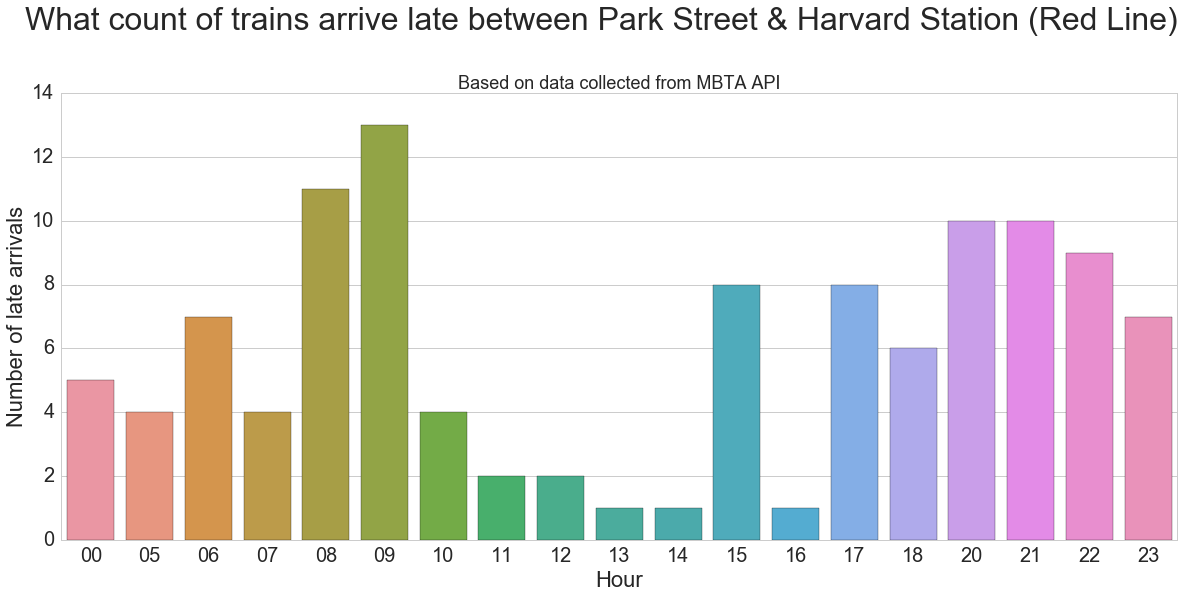

In [60]:
#Plot the barchart
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
sns.barplot(x="hour", y="l_count", data=series_df)
plt.xlabel("Hour")
plt.ylabel("Number of late arrivals")
plt.suptitle("What count of trains arrive late between Park Street & Harvard Station (Red Line)", y=1.05, fontsize=32)
plt.title("Based on data collected from MBTA API", fontsize=18)
plt.savefig("Analysis_1/Analysis_1.jpg", bbox_inches='tight')